In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
path = !pwd
path = path[0]+'/data/'
path

'/home/mic/Projects/github/python/ml-hard/2-part/data/'

In [3]:
df = pd.read_csv(path+"HW_train_main_data.csv")

In [4]:
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


In [5]:
df.isnull().sum().sort_values(ascending=False) / len(df) * 100

build_year             44.624138
apartment condition    44.524138
max_floor              31.424138
material               31.424138
num_room               31.424138
kitch_sq               31.424138
life_sq                20.913793
floor                   0.541379
id                      0.000000
timestamp               0.000000
full_sq                 0.000000
sub_area                0.000000
price                   0.000000
dtype: float64

In [6]:
### Топ-10 самых дорогих квартир
df.sort_values(by='price', ascending=False).head(10)[['id', 'price']]

,id,price
18117,85073,112444400.0
27095,14154,95255100.0
5829,88100,94932200.0
26225,78059,87549200.0
15217,91175,81827500.0
16898,45584,80388000.0
14321,95572,77305800.0
3163,63901,73377700.0
8573,92747,72611400.0
7755,40136,72380000.0


In [7]:
df.timestamp[0]

'2014-12-30'

In [8]:
df['timestamp_t'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d')
df['year'] = df.timestamp_t.dt.year
df['month'] = df.timestamp_t.dt.month

In [9]:
avg_price_ym = df.groupby(['year', 'month'])['price'].mean()
# Convert MultiIndex to a single index
avg_price_ym.index = avg_price_ym.index.map(lambda x: f'{x[0]}-{x[1]:02d}')

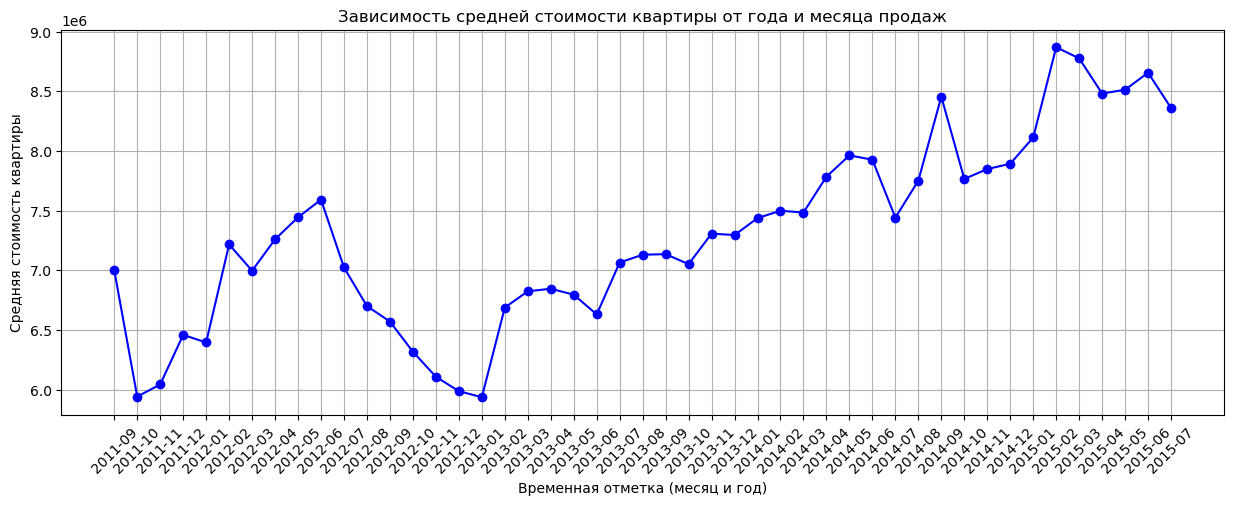

In [10]:
'''
Построить зависимость avg_price_ym средней стоимости квартиры от года и месяца продаж. 
В результате необходимо получить график, где по оси Y расположена средняя стоимость квартиры, 
а по оси X временная отметка в виде сочетания месяца и года
'''
plt.figure(figsize=(15, 5))
plt.plot(avg_price_ym.index, avg_price_ym.values, color='blue', marker='o', linestyle='-')
plt.title('Зависимость средней стоимости квартиры от года и месяца продаж')
plt.xlabel('Временная отметка (месяц и год)')
plt.xticks(rotation=45)
plt.ylabel('Средняя стоимость квартиры')
plt.grid()
plt.show()

In [11]:
df.groupby(['year', 'month'])[['id', 'price']].agg({'price': "max"})[:4]

price
year month            
2011 9      17001000.0
     10     18043800.0
     11     40811000.0
     12     26860200.0

In [72]:
# id самых дорогих квартир в каждом месяце
df.groupby(['year', 'month'])['price'].max().reset_index().merge(df, on=['year', 'month', 'price'], how='left')[['year', 'month', 'id', 'price']]

,year,month,id,price
0,2011,9,93255,17001000.0
1,2011,10,39837,18043800.0
2,2011,11,33763,40811000.0
3,2011,12,42921,26860200.0
4,2012,1,86122,24576000.0
5,2012,2,59279,38608400.0
6,2012,3,84792,62681400.0
7,2012,4,80442,34816000.0
8,2012,5,85073,112444400.0
9,2012,6,53400,35805000.0


In [13]:
df['year_month'] = df.apply(lambda x: f'{x.year}-{x.month:02d}', axis=1)
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price,timestamp_t,year,month,year_month
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0,2014-12-30,2014,12,2014-12
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0,2013-06-28,2013,6,2013-06
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0,2013-09-15,2013,9,2013-09
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0,2013-12-13,2013,12,2013-12
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0,2014-02-13,2014,2,2014-02


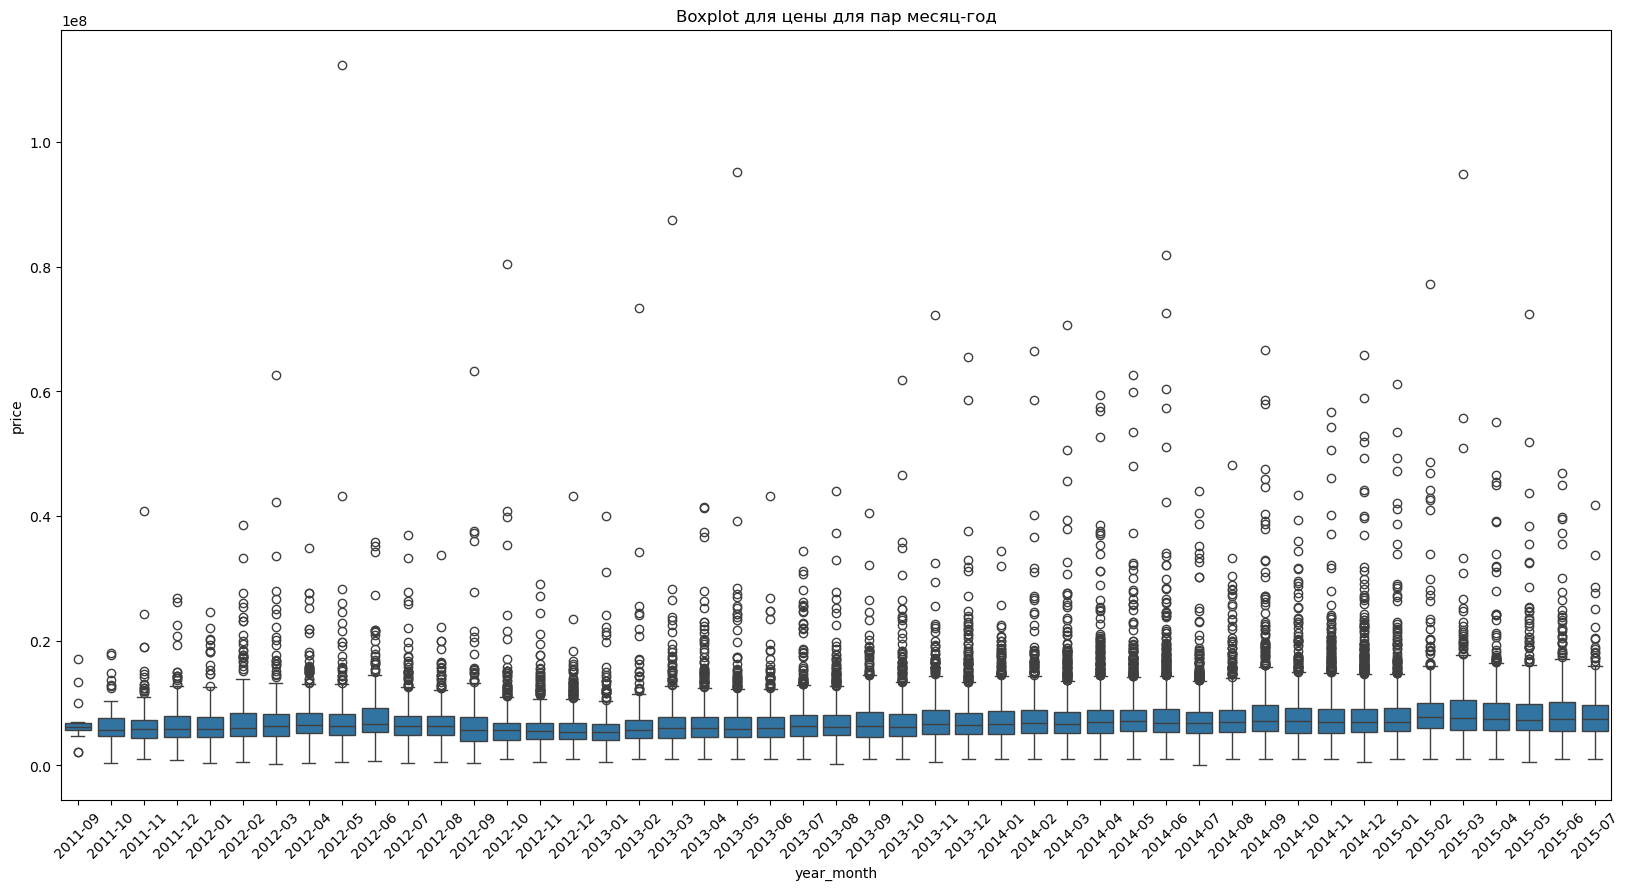

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='year_month', y='price', data=df.sort_values(by='year_month'))
plt.xticks(rotation=45)
plt.title('Boxplot для цены для пар месяц-год')
plt.show()

In [19]:
# Найти id топ-5 самых больших квартир
df.sort_values(by='full_sq', ascending=False).head(5)['id'].reset_index(drop=True)

0    95156
1    95936
2    32115
3    49518
4    41202
Name: id, dtype: int64

In [20]:
# Посчитать количество пропусков в life_sq
df.life_sq.isnull().sum()

6065

In [ ]:
# Заполнить пропуски в life_sq предложенным вами способом
df['life_sq'] = df['life_sq'].fillna(df['full_sq'] - df['kitch_sq'])

In [27]:
avg_life_sq = (df['full_sq'] - df['kitch_sq']).mean(skipna=True)
df['life_sq'] = df['life_sq'].fillna(avg_life_sq)

In [28]:
df.life_sq.isnull().sum()

0

In [43]:
# Сохранить коэффициенты корреляции Пирсона между (price, full_sq) и (price, life_sq без пропусков)
corr_price_full_sq = df[['price', 'full_sq']].corr().iloc[0,1]; corr_price_full_sq

0.3371130874205802

In [44]:
corr_price_life_sq = df[['price', 'life_sq']].corr().iloc[0,1]; corr_price_life_sq

0.3567213220509775

## Предсказание price

In [46]:
# прочитать файл и отформатировать timestamp в формате даты
main_train = pd.read_csv(path+"HW_train_main_data.csv", parse_dates=['timestamp']); main_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area,price
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,3.0,9,9711800.0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,19,6643200.0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80,5698300.0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,2.0,15,5055000.0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,2.0,74,5425000.0


In [48]:
main_test = pd.read_csv(path+"HW_test_main_data.csv", parse_dates=['timestamp']); main_test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,apartment condition,sub_area
0,30307,2014-04-20,74,43.0,13.0,14.0,1.0,1996.0,3.0,10.0,2.0,60
1,87380,2015-01-17,29,NaN,6.0,17.0,1.0,NaN,1.0,1.0,1.0,87
2,12874,2014-07-08,80,NaN,8.0,17.0,1.0,NaN,3.0,1.0,NaN,103
3,57688,2013-01-15,53,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,80
4,43433,2012-06-15,36,19.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,117


In [56]:
add_train = pd.read_csv(path+"HW_train_additional_data.csv"); add_train.head()

,id,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,155572,0.000070,5,5,240.0,1,0,7,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,111874,0.089040,5,5,NaN,0,0,10,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,129207,0.007720,6,6,NaN,0,0,4,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,125354,0.265089,4,5,1937.0,3,0,6,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,111023,0.025609,7,7,240.0,3,0,6,4,0,1,0,0.00,0.00,3,0,0,0


In [53]:
add_test = pd.read_csv(path+"HW_test_additional_data.csv"); add_test.head()

,id,population,indust_part,preschool_facilities,school_facilities,hospital_beds_raion,healthcare_facilities,university_num,sport_objects_facilities,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30307,247469,0.090799,13,14,NaN,5,0,16,16,0,15,2,12.16,0.00,5,0,0,0
1,87380,2546,0.034656,0,0,NaN,0,0,0,0,0,0,0,15.45,2.78,0,0,0,0
2,12874,4001,0.007122,0,0,NaN,0,0,0,0,0,1,0,15.29,2.83,1,0,0,0
3,57688,129207,0.007720,6,6,NaN,0,0,4,2,0,4,2,13.80,0.00,4,0,0,0
4,43433,122873,0.175055,4,4,NaN,1,0,6,0,0,0,3,0.01,0.00,4,1,0,0


In [57]:
main_train.shape, main_test.shape, add_train.shape, add_test.shape

((29000, 13), (1000, 12), (29000, 19), (1000, 19))

In [59]:
merge_train_add = main_train.merge(add_train, on='id', how='inner'); merge_train_add.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30392,2014-12-30,60,36.0,6.0,9.0,1.0,1974.0,3.0,5.0,...,3,0,16,1,2.86,0.00,0,0,0,0
1,36540,2013-06-28,44,29.0,9.0,NaN,NaN,NaN,NaN,NaN,...,3,0,11,5,9.26,2.71,1,0,0,0
2,94669,2013-09-15,62,60.0,4.0,NaN,NaN,NaN,NaN,NaN,...,2,0,4,2,13.80,0.00,4,0,0,0
3,17531,2013-12-13,33,18.0,4.0,9.0,1.0,1970.0,1.0,6.0,...,4,0,2,0,7.46,0.00,1,0,0,0
4,32159,2014-02-13,37,14.0,1.0,17.0,1.0,1991.0,1.0,1.0,...,4,0,1,0,0.00,0.00,3,0,0,0


In [60]:
merge_test_add = main_test.merge(add_test, on='id', how='inner'); merge_test_add.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,additional_education_facilities,culture_objects_facilities,shopping_centers_facilities,office_num,green_part,prom_part,cafe_count,church_facilities,mosque,leisure_facilities
0,30307,2014-04-20,74,43.0,13.0,14.0,1.0,1996.0,3.0,10.0,...,16,0,15,2,12.16,0.00,5,0,0,0
1,87380,2015-01-17,29,NaN,6.0,17.0,1.0,NaN,1.0,1.0,...,0,0,0,0,15.45,2.78,0,0,0,0
2,12874,2014-07-08,80,NaN,8.0,17.0,1.0,NaN,3.0,1.0,...,0,0,1,0,15.29,2.83,1,0,0,0
3,57688,2013-01-15,53,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,2,0,4,2,13.80,0.00,4,0,0,0
4,43433,2012-06-15,36,19.0,16.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,3,0.01,0.00,4,1,0,0


In [63]:
round(merge_train_add.isnull().sum().sort_values(ascending=False) / len(merge_train_add) * 100, 2)

hospital_beds_raion                47.40
build_year                         44.62
apartment condition                44.52
max_floor                          31.42
material                           31.42
num_room                           31.42
kitch_sq                           31.42
life_sq                            20.91
floor                               0.54
green_part                          0.00
culture_objects_facilities          0.00
shopping_centers_facilities         0.00
office_num                          0.00
id                                  0.00
prom_part                           0.00
cafe_count                          0.00
church_facilities                   0.00
sport_objects_facilities            0.00
mosque                              0.00
additional_education_facilities     0.00
preschool_facilities                0.00
university_num                      0.00
healthcare_facilities               0.00
school_facilities                   0.00
timestamp       

<Axes: >

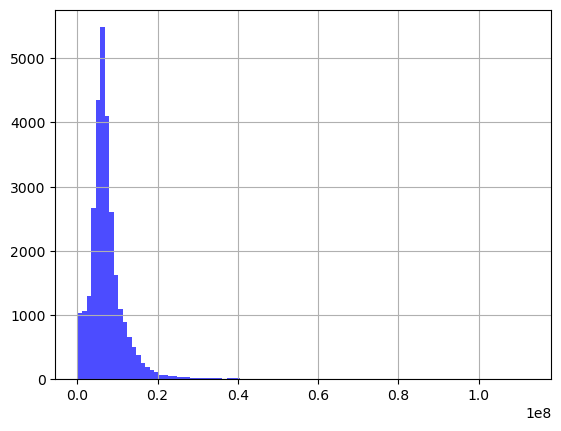

In [66]:
merge_train_add.price.hist(bins=100, color='blue', alpha=0.7)